In [2]:
# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

from tqdm import tqdm
import string
import statistics
import re
import joblib
import random
import statistics
from collections import Counter
from scipy import stats
import os
# import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import cosine_similarity
import zipfile
from matplotlib.lines import Line2D

In [3]:
df = pd.read_csv('/kaggle/input/media-study2-0/final_video_info/mir_chara_vif.csv')
dfs = pd.read_csv('/kaggle/input/media-study2-0/final_video_info/mir_soho_vif.csv')
df.head()

,title,views,length,url,video_id,comment_count,video_likes,date,time
0,Sunday Suspense | Professor Shonku | Compu | S...,434508,3159,https://www.youtube.com/watch?v=SgqeN_FUprg,SgqeN_FUprg,715,11275,2024-05-05,07:30:06
1,Sunday Suspense Classics | Satyajit Ray Storie...,372088,5062,https://www.youtube.com/watch?v=w6a9wvFugT4,w6a9wvFugT4,304,7689,2024-05-04,16:30:07
2,Sunday Suspense | Chowdhury Barir Rahasya | Ab...,1044481,16188,https://www.youtube.com/watch?v=hF6XlcgnE10,hF6XlcgnE10,2539,22110,2024-04-28,09:23:41
3,Sunday Suspense Classics | Bibhutibhushan Band...,541792,2692,https://www.youtube.com/watch?v=TnIk0dbrD04,TnIk0dbrD04,327,12246,2024-04-27,16:30:08
4,Sunday Suspense | Neel Arshola | Himadri Kisho...,596493,2342,https://www.youtube.com/watch?v=8pac77058GA,8pac77058GA,1250,15100,2024-04-21,07:30:07


In [4]:
df.isna().sum()

title            0
views            0
length           0
url              0
video_id         0
comment_count    0
video_likes      0
date             0
time             0
dtype: int64

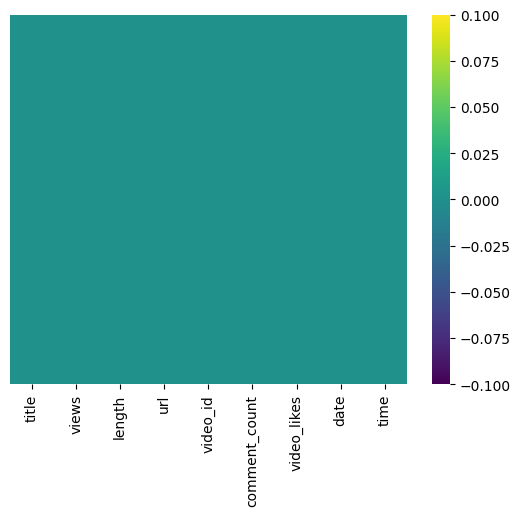

In [5]:
sns.heatmap(df.isna(), yticklabels=False, cmap='viridis');

In [6]:
cols = df.columns
print(cols)
df.dtypes

Index(['title', 'views', 'length', 'url', 'video_id', 'comment_count',
       'video_likes', 'date', 'time'],
      dtype='object')


title            object
views             int64
length            int64
url              object
video_id         object
comment_count     int64
video_likes       int64
date             object
time             object
dtype: object

In [7]:
# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])
dfs['date'] = pd.to_datetime(dfs['date'])

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year
dfs['year'] = dfs['date'].dt.year


# Count the occurrences of each year
year_counts = df['year'].value_counts()
year_counts_s = dfs['year'].value_counts()

year_counts, year_counts_s

(year
 2023    148
 2024     72
 2022     26
 Name: count, dtype: int64,
 year
 2021    52
 2019    51
 2020    49
 2022    28
 Name: count, dtype: int64)

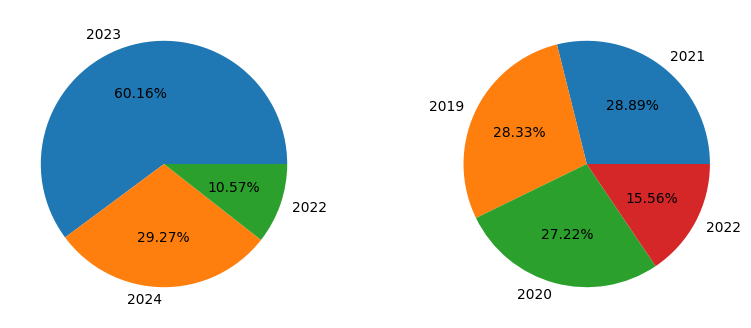

In [8]:
## Pie Chart

years = df.year.value_counts().index
year_counts = df['year'].value_counts().values

years_s = dfs.year.value_counts().index
year_counts_s  = dfs['year'].value_counts().values

# Create subplots
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.pie(year_counts, labels=years, autopct='%.2f%%');

plt.subplot(1, 2, 2)
plt.pie(year_counts_s, labels=years_s, autopct='%.2f%%');


In [9]:
# yearly_view_counts[12:]

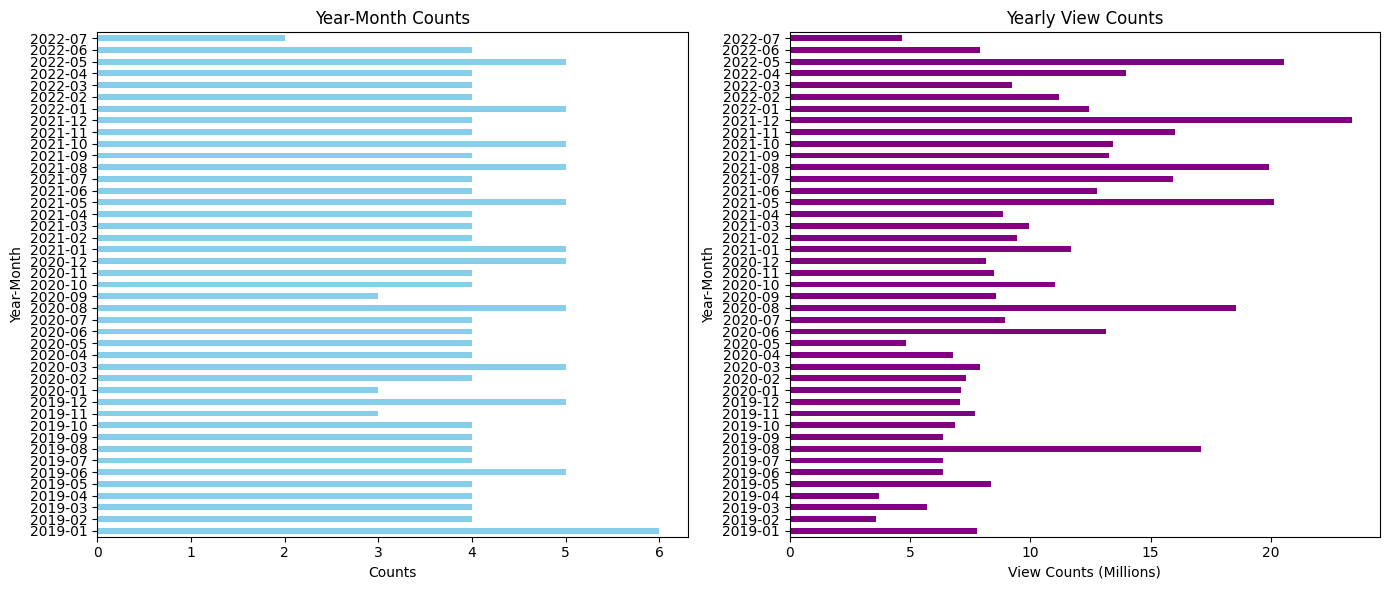

In [12]:
## Mir Soho


dfs['year_month'] = dfs['date'].dt.to_period('M')

# Count the occurrences of each year-month
year_month_counts = dfs['year_month'].value_counts().sort_index()

# Group by the year and sum the view counts
# yearly_view_counts = dfs.groupby('year_month')['views'].sum()
yearly_like_counts_s = dfs.groupby('year_month')['video_likes'].sum()
yearly_comment_counts_s = dfs.groupby('year_month')['comment_count'].sum()



# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

k = 0
# Plot year-month counts
year_month_counts[k:].plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('Year-Month Counts')
axes[0].set_xlabel('Counts')
axes[0].set_ylabel('Year-Month')

# Plot yearly view counts
# (yearly_view_counts[k:]/1e6).plot(kind='barh', ax=axes[1], color='purple')
# (yearly_like_counts_s[k:]/1e6).plot(kind='barh', ax=axes[1], color='purple')
(yearly_comment_counts_s[k:]/1e3).plot(kind='barh', ax=axes[1], color='purple')
axes[1].set_title('Yearly View Counts')
axes[1].set_xlabel('View Counts (Millions)')
axes[1].set_ylabel('Year-Month')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

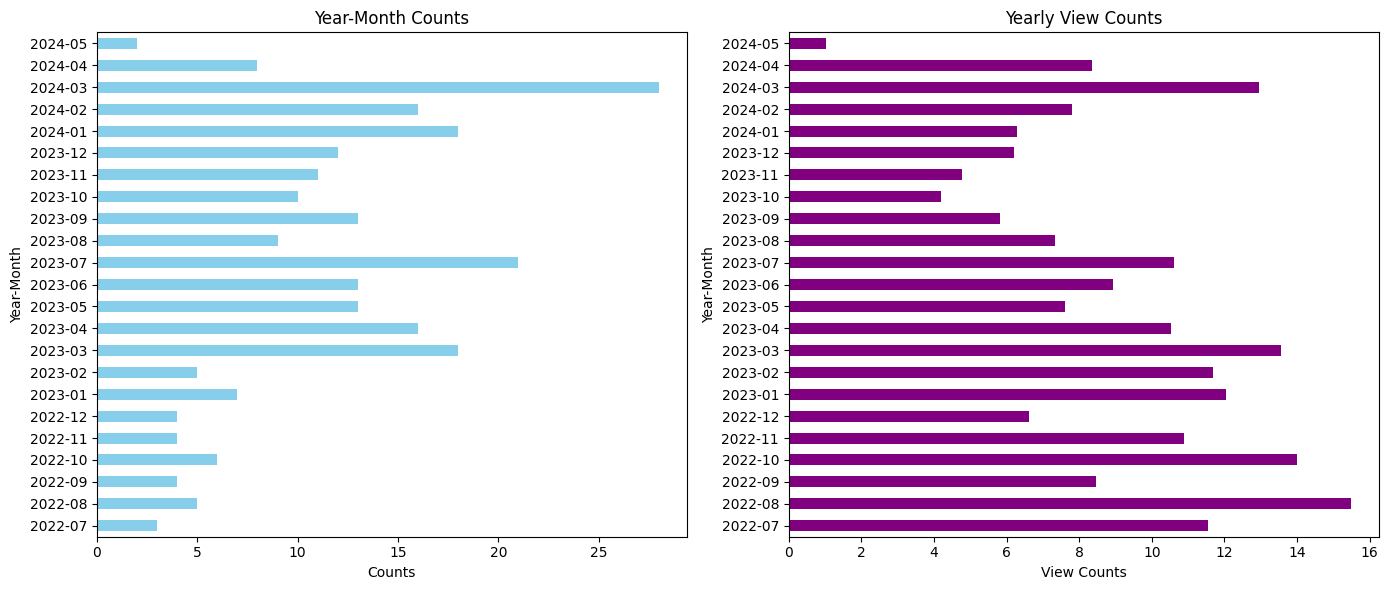

In [13]:
## Mir Xhara

df['year_month'] = df['date'].dt.to_period('M')

# Count the occurrences of each year-month
year_month_counts = df['year_month'].value_counts().sort_index()

# Group by the year and sum the view counts
yearly_view_counts = df.groupby('year_month')['views'].sum()
yearly_like_counts = df.groupby('year_month')['video_likes'].sum()
yearly_comment_counts = df.groupby('year_month')['comment_count'].sum()



# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

k = 0
# Plot year-month counts
year_month_counts[:].plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('Year-Month Counts')
axes[0].set_xlabel('Counts')
axes[0].set_ylabel('Year-Month')

# Plot yearly view counts
# (yearly_view_counts[:]/1e6).plot(kind='barh', ax=axes[1], color='purple')
(yearly_comment_counts[:]/1e3).plot(kind='barh', ax=axes[1], color='purple')
axes[1].set_title('Yearly View Counts')
axes[1].set_xlabel('View Counts')
axes[1].set_ylabel('Year-Month')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [81]:
yearly_like_counts_s.describe(), yearly_like_counts.describe()

(count        43.000000
 mean     162886.395349
 std       62830.571035
 min       61258.000000
 25%      115818.500000
 50%      151864.000000
 75%      208890.500000
 max      289051.000000
 Name: video_likes, dtype: float64,
 count        23.000000
 mean     144991.217391
 std       49177.688717
 min       18964.000000
 25%      119247.500000
 50%      132902.000000
 75%      176618.500000
 max      247607.000000
 Name: video_likes, dtype: float64)

In [87]:
df.groupby(['year', 'views']).size().reset_index()

,year,views,0
0,2022,98953,1
1,2022,133360,1
2,2022,362794,1
3,2022,536693,1
4,2022,572290,1
...,...,...,...
241,2024,775622,1
242,2024,803190,1
243,2024,817569,1
244,2024,1044481,1


In [14]:
df.info

<bound method DataFrame.info of                                                  title    views  length  \
0    Sunday Suspense | Professor Shonku | Compu | S...   434508    3159   
1    Sunday Suspense Classics | Satyajit Ray Storie...   372088    5062   
2    Sunday Suspense | Chowdhury Barir Rahasya | Ab...  1044481   16188   
3    Sunday Suspense Classics | Bibhutibhushan Band...   541792    2692   
4    Sunday Suspense | Neel Arshola | Himadri Kisho...   596493    2342   
..                                                 ...      ...     ...   
241  Dating a #SundaySuspense Lover feat Mirchi Som...   133360     216   
242  #SundaySuspense | My Dear Mickey | Saikat Mukh...  1547654    8144   
243  #SundaySuspense | Eken Babu | Manhattan ey Man...  1697215    5582   
244  #SundaySuspense | Kakababu | Bhoyonkor Shundor...  3254799   10763   
245  #SundaySuspense | Arjun | Der Din feat Indrasi...  1864906    6545   

                                             url     video_id  comm

In [17]:
df.head(2)

,title,views,length,url,video_id,comment_count,video_likes,date,time,year,year_month
0,Sunday Suspense | Professor Shonku | Compu | S...,434508,3159,https://www.youtube.com/watch?v=SgqeN_FUprg,SgqeN_FUprg,715,11275,2024-05-05,07:30:06,2024,2024-05
1,Sunday Suspense Classics | Satyajit Ray Storie...,372088,5062,https://www.youtube.com/watch?v=w6a9wvFugT4,w6a9wvFugT4,304,7689,2024-05-04,16:30:07,2024,2024-05


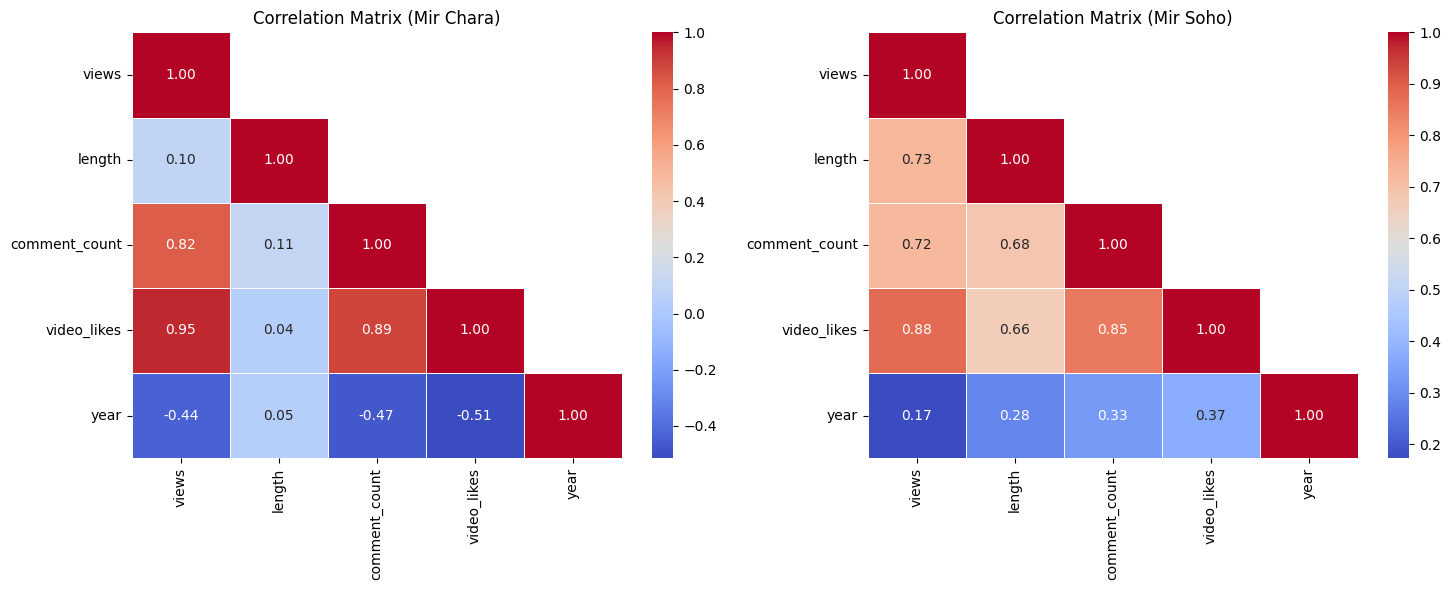

In [28]:
numerical_cols = ['views', 'length', 'comment_count', 'video_likes', 'year']

# Compute the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Create a mask for the upper triangle
mask = np.tril(np.ones_like(corr_matrix, dtype=bool))

# Apply the mask to the correlation matrix
corr_matrix_upper = corr_matrix.mask(~mask)

# Visualize the masked correlation matrix using a heatmap
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.heatmap(corr_matrix_upper, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Mir Chara)')

# Compute the correlation matrix
corr_matrix = dfs[numerical_cols].corr()

# Create a mask for the upper triangle
mask = np.tril(np.ones_like(corr_matrix, dtype=bool))

# Apply the mask to the correlation matrix
corr_matrix_upper = corr_matrix.mask(~mask)
plt.subplot(1, 2, 2)
sns.heatmap(corr_matrix_upper, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Mir Soho)')

plt.tight_layout()
plt.show()
